## Randomforest Model

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [9]:
df = pd.read_csv("../Data/BankChurners.csv")

In [10]:
# Define the features (X) and the target (y)
X = df[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
        'Marital_Status_Unknown',"Marital_Status_Single","Marital_Status_Married", 'Income_Category', 'Card_Category', 'Months_on_book',
        'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
        'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
        'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y = df['Attrition_Flag']

# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Accuracy: 0.9570582428430404

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86       327
           1       0.96      0.99      0.97      1699

    accuracy                           0.96      2026
   macro avg       0.94      0.89      0.92      2026
weighted avg       0.96      0.96      0.96      2026


Confusion Matrix:
 [[ 261   66]
 [  21 1678]]


Predicted,0,1,All
Actual,,,
0,261,66,327
1,21,1678,1699
All,282,1744,2026


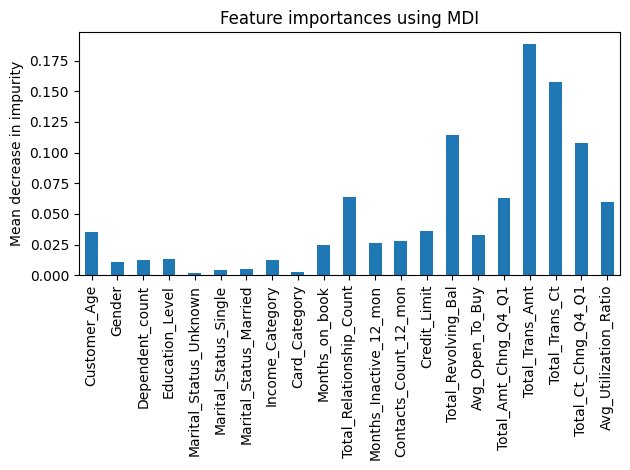

In [13]:
importances = rf_classifier.feature_importances_
forest_importances = pd.Series(importances, index = X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()